In [582]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [583]:
df = pd.read_excel("../data/RWTCd.xls", sheet_name="Data 1", skiprows=2)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)

In [584]:
print(df.columns)
print(df.head())

Index(['Price'], dtype='object')
            Price
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87


In [585]:
print(df.isnull().sum())

Price    0
dtype: int64


In [586]:
print(df.dtypes)

Price    float64
dtype: object


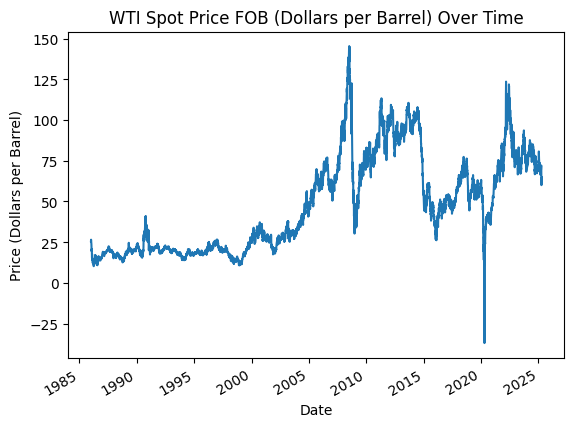

In [587]:
df['Price'].plot()
plt.title('WTI Spot Price FOB (Dollars per Barrel) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.show()
plt.close()

In [588]:
# convert data to monthly
monthly_df = df.resample('M').mean()

/var/folders/rz/rmh6_xns41z59zd1wsh6d8pw0000gn/T/ipykernel_3248/1647970859.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').mean()


In [589]:
monthly_df.head()

,Price
Date,
1986-01-31,22.925455
1986-02-28,15.454737
1986-03-31,12.612500
1986-04-30,12.843636
1986-05-31,15.377619


In [590]:
# splitting data
train = monthly_df['2015-12-31':'2022-12-31'] # Just taking a sizeable chunk, can use all for more information
test = monthly_df['2022-12-31':]

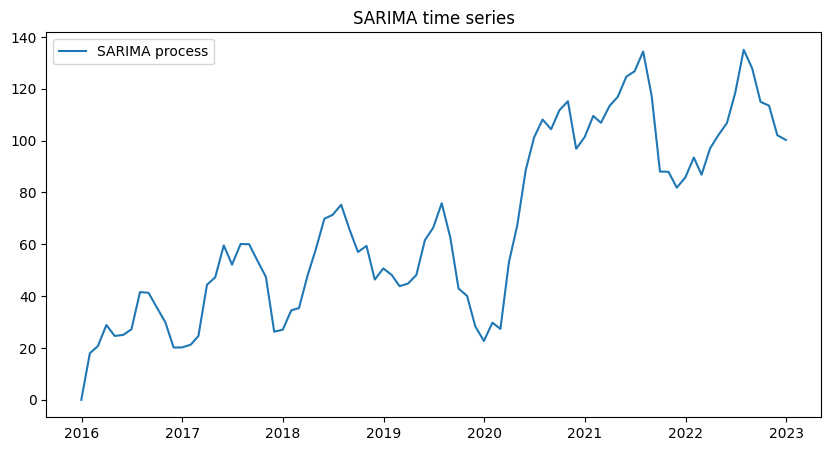

In [591]:
monthly_df['covid_moment'] = 0
monthly_df.loc['2020-04-30', 'covid_moment'] = 1
covid_moment = monthly_df['covid_moment'].loc[train.index]

model = SARIMAX(train['Price'],
                exog=covid_moment,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

fitted_model = model.fit(disp=False)

n = len(monthly_df['2015-12-31':'2022-12-31'])

sarima_process = fitted_model.simulate(nsimulations=n, initial_state=fitted_model.filter_results.initial_state)

plt.figure(figsize=(10, 5))
plt.plot(sarima_process, label='SARIMA process')
plt.title('SARIMA time series')
plt.legend()
plt.show()
plt.close()

In [592]:
# get optimal ARIMA model
model = auto_arima(
    sarima_process,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
)

/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=627.870, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=599.779, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=612.660, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=627.077, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=622.834, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=581.673, Time=0.08 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366

 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=578.790, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=579.936, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=578.132, Time=0.14 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=598.123, Time=0.14 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=611.331, Time=0.04 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=585.480, Time=0.17 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=577.122, Time=0.20 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=600.095, Time=0.13 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=578.876, Time=0.23 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=612.906, Time=0.05 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=577.677, Time=0.16 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[12] intercept   : AIC=578.499, Time=0.28 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=578.483, Time=0.34 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=578.259, Time=0.20 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,2)[12] intercept   : AIC=580.425, Time=0.28 sec
 ARIMA(2,1,0)(1,0,2)[12]             : AIC=575.271, Time=0.19 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12]             : AIC=598.404, Time=0.09 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=inf, Time=0.12 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[12]             : AIC=577.020, Time=0.21 sec
 ARIMA(2,1,0)(0,0,1)[12]             : AIC=611.452, Time=0.03 sec
 ARIMA(2,1,0)(2,0,1)[12]             : AIC=575.817, Time=0.14 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12]             : AIC=576.272, Time=0.13 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[12]             : AIC=576.673, Time=0.23 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12]             : AIC=576.671, Time=0.29 sec
 ARIMA(1,1,1)(1,0,2)[12]             : AIC=576.396, Time=0.19 sec


/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,2)[12]             : AIC=578.610, Time=0.34 sec

Best model:  ARIMA(2,1,0)(1,0,2)[12]          
Total fit time: 5.466 seconds


In [593]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   85
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -281.635
Date:                                 Sat, 26 Apr 2025   AIC                            575.271
Time:                                         01:44:12   BIC                            589.856
Sample:                                     12-31-2015   HQIC                           581.134
                                          - 12-31-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4103      0.127      3.222      0.001       0.161       0

In [594]:
n_periods = len(monthly_df['2023-01-01':'2025-4-21'])
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = monthly_df['2023-01-01':'2025-12-31'].index[:n_periods]

/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/albertzhang/Documents/366-Asian-Options/sarimavenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [595]:
print(conf_int[0:5])

[[ 91.98469156 115.99880978]
 [ 79.7423279  121.25261812]
 [ 85.39144271 138.35953253]
 [ 89.02229239 150.12388287]
 [ 98.52179387 166.4404187 ]]


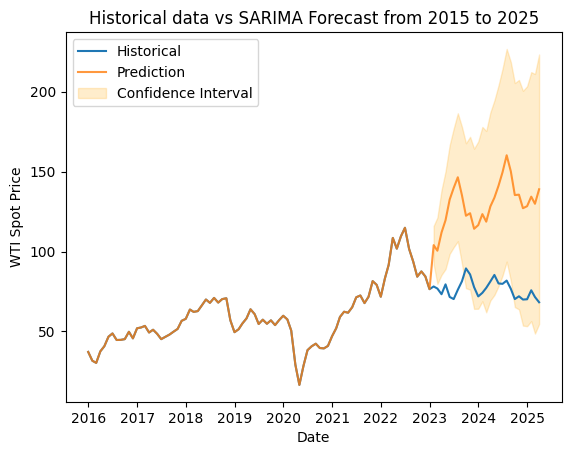

In [596]:
traj_index = monthly_df['2015-12-31':'2022-12-31'].index.append(forecast_index)
traj = pd.concat([monthly_df['2015-12-31':'2022-12-31']['Price'], forecast])
plt.plot(monthly_df['2015-12-31':'2025-4-21'].index, monthly_df['2015-12-31':'2025-4-21']['Price'], label='Historical')
plt.plot(traj_index, traj, label='Prediction', alpha=0.8)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], label='Confidence Interval', color='orange', alpha=0.2)
plt.title('Historical data vs SARIMA Forecast from 2015 to 2025')
plt.xlabel('Date')
plt.ylabel('WTI Spot Price')
plt.legend()
plt.show()

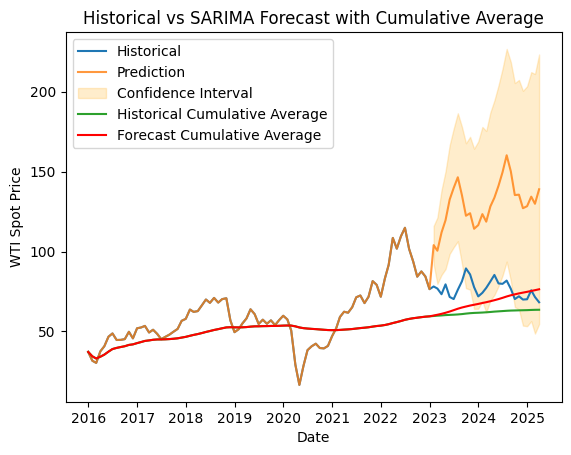

In [597]:
historical_cum_avg = monthly_df['2015-12-31':'2025-4-21']['Price'].expanding().mean()
forecast_cum_avg = traj.expanding().mean()
plt.plot(monthly_df['2015-12-31':'2025-4-21'].index, monthly_df['2015-12-31':'2025-4-21']['Price'], label='Historical', alpha=1)
plt.plot(traj_index, traj, label='Prediction', alpha=0.8)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], label='Confidence Interval', color='orange', alpha=0.2)

plt.plot(monthly_df['2015-12-31':'2025-4-21'].index, historical_cum_avg, label='Historical Cumulative Average')
plt.plot(traj_index, forecast_cum_avg, label='Forecast Cumulative Average', color='red')

plt.title('Historical vs SARIMA Forecast with Cumulative Average')
plt.xlabel('Date')
plt.ylabel('WTI Spot Price')
plt.legend()
plt.show()